## Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [1]:
import pandas as pd

In [2]:
## Read the Dataset

df=pd.read_csv('/Users/harshulgarg/Downloads/571_DataMining/bankruptcy-project/bankruptcy_Train_11.csv')

In [3]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,-0.07377,-0.06176,0.43760,0.09161,0.00760,0.01921,-0.00513,0.11940,-0.34285,0.06321,...,0.00996,0.00311,-0.01012,-0.01854,-0.04204,-0.08488,-0.01776,0.30969,-0.03869,0
1,-0.03598,0.06952,-0.56256,-0.19630,0.00580,0.01583,0.00154,-0.47050,-0.37813,-0.07964,...,0.00947,0.01123,-0.00962,-0.01461,-0.04609,-0.04808,-0.00084,-0.52116,-0.03699,0
2,0.11752,-0.12409,1.48207,0.47935,0.01330,0.06845,0.03210,1.63554,-0.02624,0.14933,...,0.01319,0.01359,-0.01335,-0.02341,-0.04500,-0.27641,-0.00932,-0.37576,-0.04437,0
3,-0.07362,-0.06326,0.71754,0.20310,0.00866,-0.01605,-0.00757,0.21376,-0.86658,0.09124,...,0.01543,0.00303,-0.01552,-0.01936,-0.04691,-0.31105,-0.00989,-0.35877,-0.04633,0
4,0.39546,-0.00677,-0.16329,-0.11619,0.00711,-0.01605,0.10899,-0.20876,0.28453,0.01970,...,0.01249,0.04644,-0.01249,-0.01504,-0.04020,0.63102,-0.01723,0.20016,-0.03771,0


In [4]:
df.shape

(10000, 65)

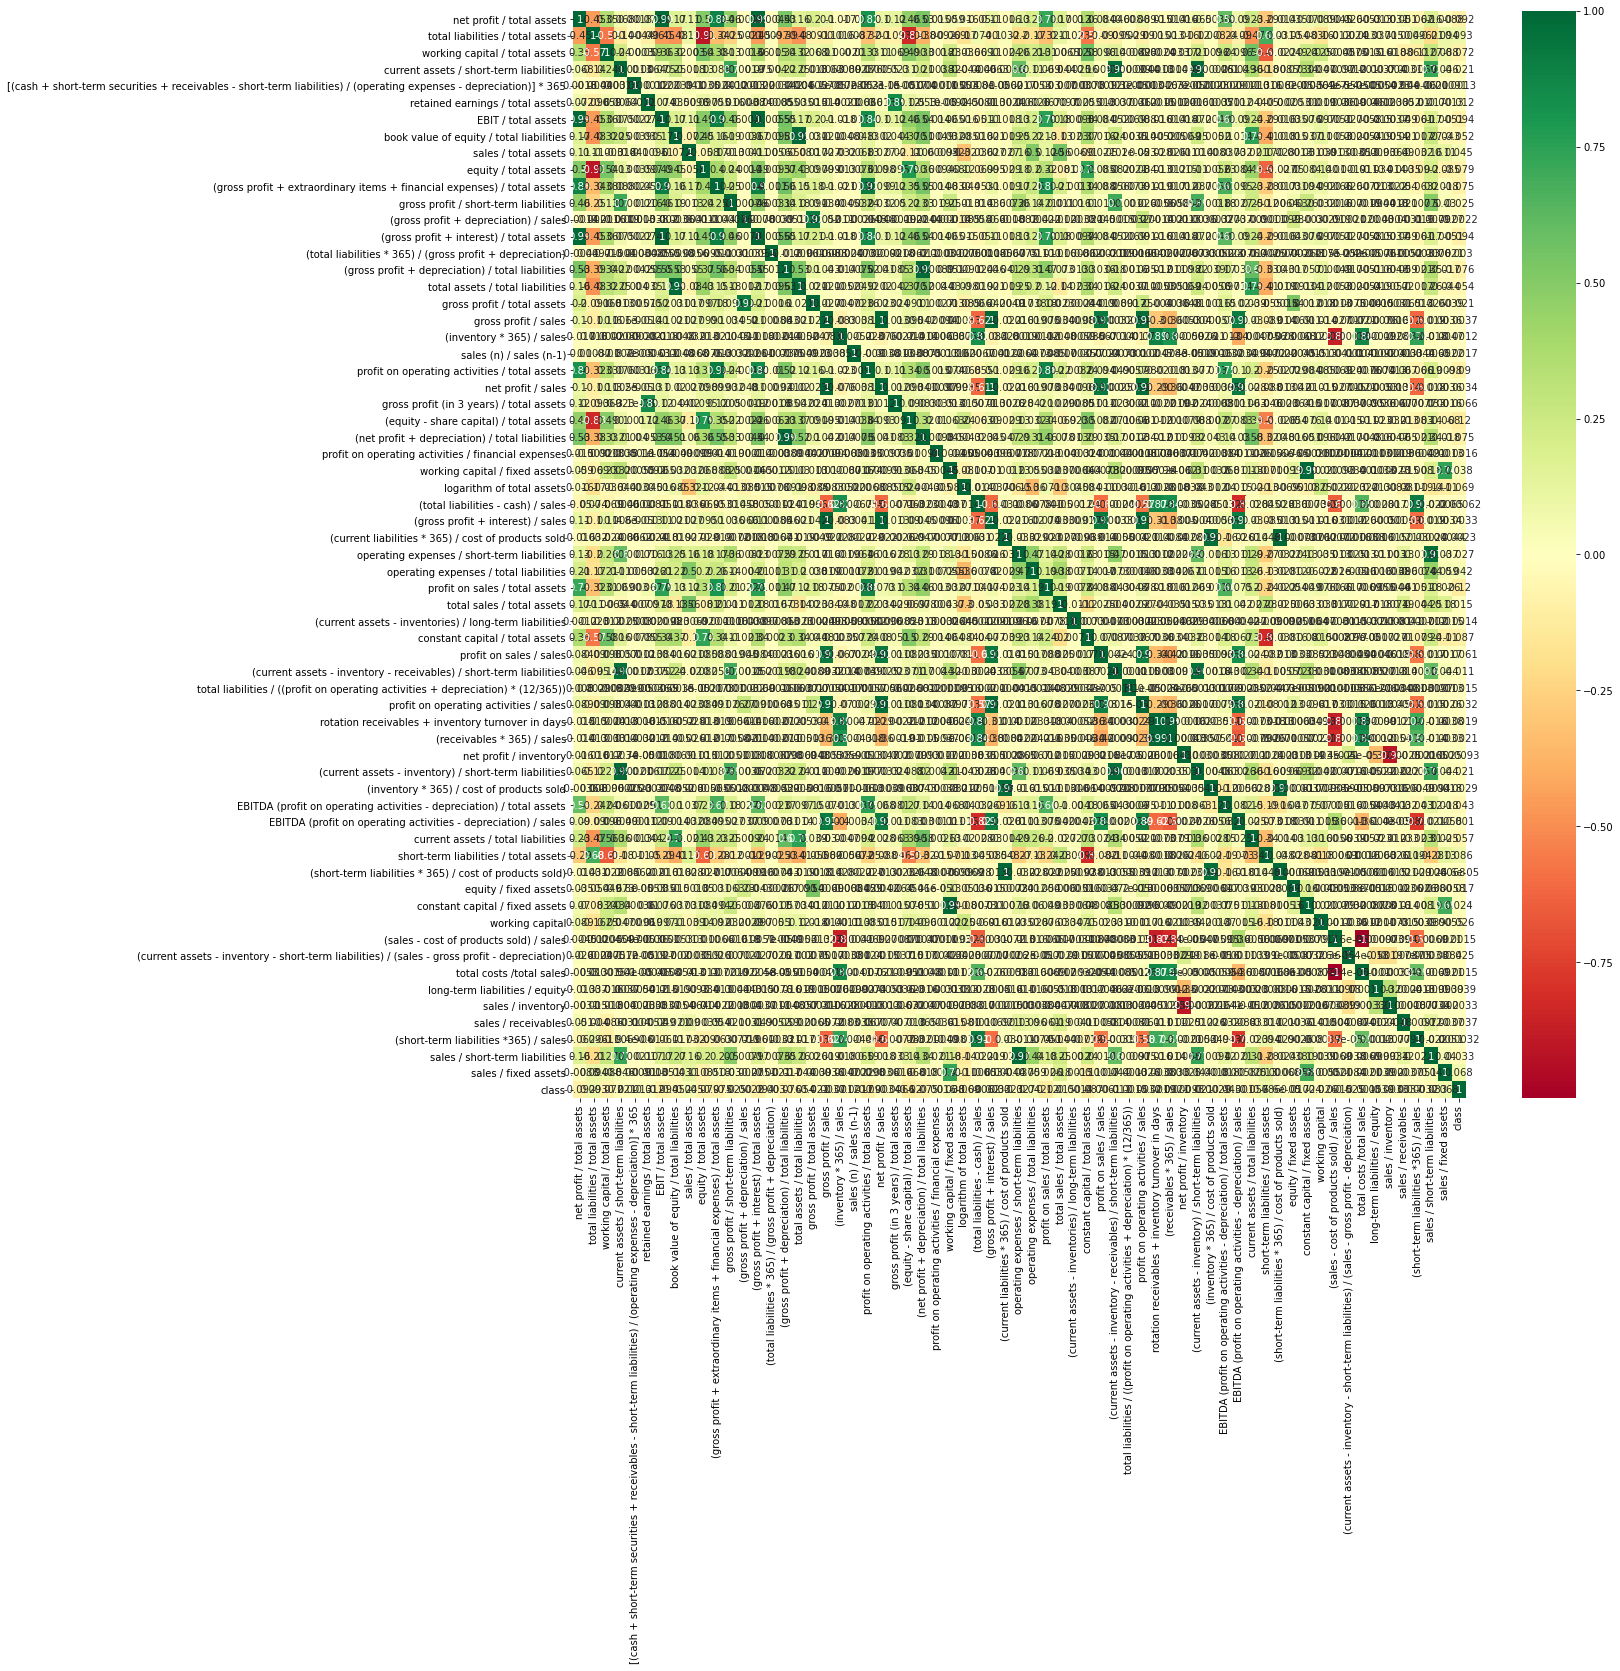

In [5]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
#Get the Independent and Dependent Features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [7]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: class, Length: 10000, dtype: int64

In [8]:
X.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,-0.07377,-0.06176,0.43760,0.09161,0.00760,0.01921,-0.00513,0.11940,-0.34285,0.06321,...,0.16271,0.00996,0.00311,-0.01012,-0.01854,-0.04204,-0.08488,-0.01776,0.30969,-0.03869
1,-0.03598,0.06952,-0.56256,-0.19630,0.00580,0.01583,0.00154,-0.47050,-0.37813,-0.07964,...,-0.13300,0.00947,0.01123,-0.00962,-0.01461,-0.04609,-0.04808,-0.00084,-0.52116,-0.03699
2,0.11752,-0.12409,1.48207,0.47935,0.01330,0.06845,0.03210,1.63554,-0.02624,0.14933,...,0.69344,0.01319,0.01359,-0.01335,-0.02341,-0.04500,-0.27641,-0.00932,-0.37576,-0.04437
3,-0.07362,-0.06326,0.71754,0.20310,0.00866,-0.01605,-0.00757,0.21376,-0.86658,0.09124,...,0.04915,0.01543,0.00303,-0.01552,-0.01936,-0.04691,-0.31105,-0.00989,-0.35877,-0.04633
4,0.39546,-0.00677,-0.16329,-0.11619,0.00711,-0.01605,0.10899,-0.20876,0.28453,0.01970,...,-0.11260,0.01249,0.04644,-0.01249,-0.01504,-0.04020,0.63102,-0.01723,0.20016,-0.03771


In [13]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.001,0.01,0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7,9 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,0.6,0.7],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 0.9],
 "n_estimators" : [50,100,150,175,200,300,400,500,1000]
}

In [14]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [15]:
import xgboost

In [16]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [17]:
classifier=xgboost.XGBClassifier()

In [18]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [19]:
Y.value_counts()

0    9780
1     220
Name: class, dtype: int64

In [ ]:
import re
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [23]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   10.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.7s finished
/Users/sachinsinghal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1176: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:06] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 37.56 seconds.


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
random_search.best_params_

{'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.9}

In [28]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=500, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=10)

/Users/sachinsinghal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1176: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:39] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/sachinsinghal/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[23:55:50] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:02] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:56:13] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behav

In [30]:
score

array([0.98 , 0.98 , 0.983, 0.983, 0.981, 0.98 , 0.985, 0.984, 0.987,
       0.979])

In [31]:
score.mean()

0.9822

In [32]:
classifier.fit(X,Y)

[23:58:03] WARNING: /Users/sachinsinghal/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
df_test=pd.read_csv('/Users/harshulgarg/Downloads/571_DataMining/bankruptcy-project/bankruptcy_Test_X.csv')

In [34]:
X_test = df_test.iloc[:,1:]

In [35]:
preds_probab = classifier.predict_proba(X_test)

In [36]:
preds_probab

array([[9.98668551e-01, 1.33144169e-03],
       [9.99819696e-01, 1.80329502e-04],
       [9.95753407e-01, 4.24659252e-03],
       ...,
       [9.97778356e-01, 2.22162413e-03],
       [9.99862552e-01, 1.37423413e-04],
       [9.99889076e-01, 1.10896115e-04]], dtype=float32)

In [37]:
final=preds_probab[:,1]

In [38]:
preds = classifier.predict(X_test)

In [39]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
df_test['Prediction'] = final

In [41]:
df_test

,ID,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Prediction
0,1,-0.07223,-0.04635,0.66037,0.02218,0.00793,-0.01605,-0.00756,0.04768,-0.32059,...,0.00947,0.00320,-0.00941,-0.02047,-0.04330,-0.29530,-0.01270,-0.24607,-0.03790,0.001331
1,2,-0.07838,-0.04473,1.54398,0.48191,0.00775,-0.01861,-0.00838,0.03407,-0.43178,...,0.00931,0.00275,-0.00938,-0.01942,-0.04668,-0.19682,-0.01626,0.04775,-0.03546,0.000180
2,3,-0.08212,-0.10585,-0.11386,-0.01305,0.00731,-0.01796,-0.00903,1.00335,-0.73230,...,0.00917,0.00240,-0.00936,-0.02175,-0.04380,-0.10094,-0.01540,-0.05059,-0.04688,0.004247
3,4,0.05066,-0.01911,1.22014,0.04251,0.00929,0.03455,0.01574,-0.16367,-0.30407,...,0.01047,0.01439,-0.01063,-0.01993,-0.04379,-0.36133,-0.00407,-0.48172,-0.02976,0.000099
4,5,0.14709,-0.03728,0.71079,0.29907,0.00781,-0.01605,0.04081,-0.02429,-0.30892,...,0.01154,0.02018,-0.01158,-0.01785,-0.04437,0.56234,-0.01796,0.35946,-0.04095,0.000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-0.10566,-0.02710,0.08429,-0.12316,0.00728,0.01678,-0.01311,-0.14300,-0.40692,...,0.00903,0.00042,-0.00919,-0.02287,-0.04033,-0.14331,-0.01481,-0.10578,-0.02390,0.000027
4996,4997,-0.12657,-0.00401,0.33210,-0.06974,0.00749,-0.01605,-0.01674,-0.22218,0.95079,...,0.00874,-0.00160,-0.00917,-0.02225,-0.03648,-0.11436,-0.01703,0.16437,-0.02181,0.034470
4997,4998,0.12382,-0.06435,1.68830,0.23752,0.00803,-0.01605,0.03280,0.22625,0.26470,...,0.01031,0.01636,-0.01050,-0.02146,-0.04413,-0.06407,-0.01669,0.10846,-0.00067,0.002222
4998,4999,-0.05399,-0.01040,-0.48899,-0.18768,0.00725,0.06410,-0.00204,-0.30612,-0.35273,...,0.00983,0.00617,-0.00999,-0.01527,-0.02933,-0.14043,-0.01439,-0.13954,-0.03911,0.000137
